## TF-представление

Пример 1.1 Генерация свернутого унитарного или бинарного представления с помощью sklearn.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [2]:
corpus = ['Time flies flies like an arrow.', 'Fruit flies like a banana.']

In [3]:
vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']

In [4]:
one_hot_vectorizer = CountVectorizer(binary=True)

In [5]:
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()

In [6]:
one_hot

array([[1, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 0]], dtype=int64)

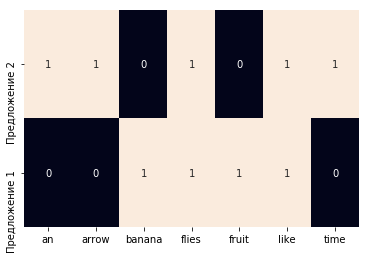

In [7]:
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Предложение 2', 'Предложение 1'])

## TF-IDF представление

Пример 1.2 Генерация TF-IDF-представления

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tfidf_vectorizer = TfidfVectorizer()

In [10]:
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

In [11]:
tfidf

array([[0.42519636, 0.42519636, 0.        , 0.60506143, 0.        ,
        0.30253071, 0.42519636],
       [0.        , 0.        , 0.57615236, 0.40993715, 0.57615236,
        0.40993715, 0.        ]])

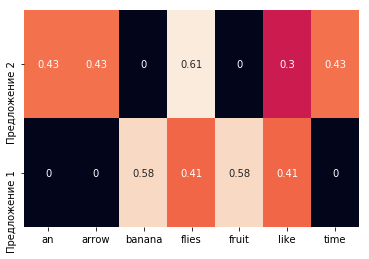

In [12]:
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Предложение 2', 'Предложение 1'])

## Знакомство с Pytorch

Установка Pytorch

In [13]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.9581, 0.7144, 0.8957],
        [0.7067, 0.2630, 0.2756],
        [0.1727, 0.9382, 0.3951],
        [0.0719, 0.4118, 0.2145],
        [0.3439, 0.5002, 0.8426]])


In [14]:
torch.cuda.is_available()

True

Напишем вспомогательную функцию, описывающую различные характеристики тензоров

In [15]:
def describe(x):
    print(f'Тип тензора: {x.type()}')
    print(f'Размерность тензора: {x.shape}')
    print(f'Значения тензора: \n{x}\n')

In [16]:
describe(torch.Tensor(2, 3))

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])



**Пример 1.4**

In [17]:
describe(torch.rand(2, 3))    # случайное равномерное распределение
describe(torch.randn(2, 3))   # случайное нормальное распределение

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0.9411, 0.4547, 0.1932],
        [0.8223, 0.3562, 0.1063]])

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0.1986, 0.3061, 1.0440],
        [0.9070, 0.2279, 0.3439]])



**Пример 1.5**

In [18]:
describe(torch.zeros(2, 3))

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])



In [19]:
x = torch.ones(2, 3)
describe(x)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])



In [20]:
x.fill_(5)
describe(x)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])



**Пример 1.6**

In [21]:
x = torch.Tensor([[1, 2, 3],
                  [4, 5, 6]])
describe(x)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])



In [22]:
import numpy as np

In [23]:
npy = np.random.rand(2,3)
npy

array([[0.53210376, 0.53682294, 0.80362703],
       [0.91499237, 0.64333994, 0.18523974]])

In [24]:
describe(torch.from_numpy(npy))

Тип тензора: torch.DoubleTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0.5321, 0.5368, 0.8036],
        [0.9150, 0.6433, 0.1852]], dtype=torch.float64)



## Типы и размер тензоров

**Пример 1.8**

In [25]:
x = torch.FloatTensor([[1, 2, 3], 
                       [4, 5, 6]])
describe(x)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])



In [26]:
x = x.long()
describe(x)

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[1, 2, 3],
        [4, 5, 6]])



In [27]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.int64)
describe(x)

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[1, 2, 3],
        [4, 5, 6]])



In [28]:
x = x.float()
describe(x)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])



## Операции над тензорами

**Пример 1.9**

In [29]:
x = torch.randn(2, 3)
describe(x)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[ 0.3717,  0.4919,  1.3695],
        [-0.8162, -1.2428,  0.3855]])



In [30]:
describe(x + x)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[ 0.7434,  0.9839,  2.7389],
        [-1.6324, -2.4856,  0.7709]])



In [31]:
describe(x.add(x))

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[ 0.7434,  0.9839,  2.7389],
        [-1.6324, -2.4856,  0.7709]])



**Пример 1.10** Операции над отдельными измерениями тензоров

In [32]:
x = torch.arange(6)
describe(x)

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([6])
Значения тензора: 
tensor([0, 1, 2, 3, 4, 5])



In [33]:
x = x.view(2, 3)
describe(x)

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0, 1, 2],
        [3, 4, 5]])



In [34]:
describe(torch.sum(x, dim=0))

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([3])
Значения тензора: 
tensor([3, 5, 7])



In [35]:
describe(torch.sum(x, dim=1))

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2])
Значения тензора: 
tensor([ 3, 12])



In [36]:
describe(torch.transpose(x, 0, 1))

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([3, 2])
Значения тензора: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])



## Обращение по индексу, срезы и объединения

**Пример 1.11** Выполнение срезов и обращение по индексу

In [37]:
x = torch.arange(6).view(2, 3)
describe(x)

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0, 1, 2],
        [3, 4, 5]])



In [38]:
describe(x[:1, :2])

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([1, 2])
Значения тензора: 
tensor([[0, 1]])



In [39]:
describe(x[0, 1])

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([])
Значения тензора: 
1



**Пример 1.12** Сложный доступ по индексам: обращение по индексам к несмежным участкам тензора

In [40]:
indices = torch.LongTensor([0, 1])
describe(torch.index_select(x, dim=1, index=indices))

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 2])
Значения тензора: 
tensor([[0, 1],
        [3, 4]])



In [41]:
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices))

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0, 1, 2],
        [0, 1, 2]])



**Пример 1.13** Конкатенация тензоров

In [42]:
x = torch.arange(6).view(2, 3)
describe(x)

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0, 1, 2],
        [3, 4, 5]])



In [43]:
describe(torch.cat([x, x], dim=0))

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([4, 3])
Значения тензора: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])



In [44]:
describe(torch.cat([x, x], dim=1))

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 6])
Значения тензора: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])



In [45]:
describe(torch.stack([x, x]))

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 2, 3])
Значения тензора: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])



**Пример 1.14** Операции линейной алгебры над тензорами

In [46]:
x1 = torch.arange(6).view(2, 3)
describe(x1)

Тип тензора: torch.LongTensor
Размерность тензора: torch.Size([2, 3])
Значения тензора: 
tensor([[0, 1, 2],
        [3, 4, 5]])



In [47]:
x2 = torch.ones(3, 2)

In [48]:
x2[:, 1] += 1
describe(x2)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([3, 2])
Значения тензора: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])



In [49]:
describe(torch.mm(x1.float(), x2))

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 2])
Значения тензора: 
tensor([[ 3.,  6.],
        [12., 24.]])



## Тензоры и графы вычислений

**Пример 1.15** Создание тензоров для вспомогательных операций работы с градиентами

In [50]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 2])
Значения тензора: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

True


In [51]:
y = (x + 2) * (x + 5) + 3
describe(y)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([2, 2])
Значения тензора: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)



In [52]:
z = y.mean()
describe(z)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([])
Значения тензора: 
21.0



In [53]:
z.backward()

In [54]:
print(x.grad is None)

False


In [55]:
describe(z)

Тип тензора: torch.FloatTensor
Размерность тензора: torch.Size([])
Значения тензора: 
21.0



In [56]:
x.grad

tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])

**Пример 1.16** Создание CUDA-тензоров

In [57]:
print(torch.cuda.is_available())

True


In [58]:
# предпочтительный метод: аппаратно-независимое создание экземпляров тензоров
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [59]:
x = torch.rand(3, 3).to(device)
describe(x)

Тип тензора: torch.cuda.FloatTensor
Размерность тензора: torch.Size([3, 3])
Значения тензора: 
tensor([[0.9787, 0.2838, 0.5747],
        [0.6526, 0.5668, 0.2550],
        [0.6774, 0.9479, 0.3523]], device='cuda:0')



**Пример 1.17** Совместное использование CUDA- и CPU- тензоров

In [61]:
y = torch.rand(3, 3)

In [62]:
y

tensor([[0.8855, 0.1920, 0.4274],
        [0.3098, 0.7277, 0.0408],
        [0.6742, 0.7018, 0.0092]])

In [68]:
x + y

RuntimeError: expected device cuda:0 but got device cpu

In [69]:
cpu_device = torch.device('cpu')

In [70]:
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[1.8642, 0.4759, 1.0021],
        [0.9624, 1.2945, 0.2959],
        [1.3515, 1.6497, 0.3615]])

### Упражнения

№1 Создайте двумерный тензор, после чего добавьте в него новое измерение размером 1 перед измерением 0.

In [82]:
x = torch.randn(3, 3)
x

tensor([[-0.2224,  1.1801,  0.3212],
        [ 0.0599,  0.6940, -0.0024],
        [-0.4058, -1.7246, -0.5929]])

In [83]:
x.size()

torch.Size([3, 3])

In [84]:
x[:, :]

tensor([[-0.2224,  1.1801,  0.3212],
        [ 0.0599,  0.6940, -0.0024],
        [-0.4058, -1.7246, -0.5929]])

In [85]:
x = x[None, :, :]

In [87]:
x.size()

torch.Size([1, 3, 3])

**

In [94]:
x = torch.randn(3, 3)

In [95]:
x.view(1, 3, 3)

tensor([[[ 1.2276, -0.3047, -0.6833],
         [-0.5242, -0.6914, -0.1703],
         [-0.7792,  0.6193, -0.7097]]])

№ 2 Удалите дополнительное измерение, которое вы только что добавили в предыдущий тензор.

In [86]:
x

tensor([[[-0.2224,  1.1801,  0.3212],
         [ 0.0599,  0.6940, -0.0024],
         [-0.4058, -1.7246, -0.5929]]])

In [93]:
x.view(3, 3)

tensor([[-0.2224,  1.1801,  0.3212],
        [ 0.0599,  0.6940, -0.0024],
        [-0.4058, -1.7246, -0.5929]])

№ 3 Создайте случайный тензор формой 5 × 3 в интервале [3, 7).

In [99]:
x = torch.randint(3, 7, (5, 3))

In [97]:
x

tensor([[3, 4, 5],
        [6, 3, 4],
        [3, 6, 3],
        [4, 5, 4],
        [5, 6, 3]])

№ 4 Создайте тензор со значениями, взятыми из нормального распределения (математическое ожидание = 0, стандартное отклонение = 1).

In [100]:
x = torch.randn(3, 3)

In [101]:
x

tensor([[ 0.1741, -0.7084,  0.2643],
        [-1.1925, -0.4294,  1.4478],
        [ 1.0027, -0.7672,  0.8828]])

№ 5 Извлеките индексы всех ненулевых элементов из тензора torch.Tensor([1, 1, 1, 0, 1]).

In [102]:
x = torch.Tensor([1, 1, 1, 0, 1])
x

tensor([1., 1., 1., 0., 1.])

In [106]:
(x == 1).nonzero()

tensor([[0],
        [1],
        [2],
        [4]])

№ 6 Создайте случайный тензор размером (3,1), а затем горизонтально разместите в ряд четыре его копии. 

In [108]:
x = torch.rand(3, 1)
x

tensor([[0.7723],
        [0.4061],
        [0.1698]])

In [112]:
torch.cat([x, x, x, x], dim=1)

tensor([[0.7723, 0.7723, 0.7723, 0.7723],
        [0.4061, 0.4061, 0.4061, 0.4061],
        [0.1698, 0.1698, 0.1698, 0.1698]])

№ 7 Верните пакетное произведение двух трехмерных матриц (a=torch.rand(3,4,5), b=torch.rand(3,5,4)).

In [113]:
a = torch.rand(3, 4, 5)
a

tensor([[[0.8086, 0.3613, 0.0420, 0.9585, 0.2083],
         [0.2285, 0.4885, 0.9350, 0.2151, 0.0879],
         [0.1473, 0.4601, 0.4137, 0.2963, 0.8665],
         [0.7993, 0.9235, 0.2063, 0.3465, 0.0635]],

        [[0.2646, 0.4662, 0.2647, 0.4845, 0.4956],
         [0.1032, 0.3395, 0.9050, 0.8150, 0.1846],
         [0.8875, 0.1278, 0.9983, 0.4381, 0.7180],
         [0.8959, 0.8092, 0.8347, 0.4973, 0.9642]],

        [[0.1298, 0.1829, 0.0410, 0.1582, 0.4198],
         [0.8423, 0.0252, 0.8942, 0.0676, 0.0639],
         [0.1871, 0.2027, 0.1065, 0.1593, 0.2963],
         [0.0179, 0.3508, 0.3866, 0.5238, 0.5766]]])

In [121]:
a.size()

torch.Size([3, 4, 5])

In [115]:
b = torch.rand(3, 5, 4)
b

tensor([[[0.3970, 0.9217, 0.2955, 0.3079],
         [0.0060, 0.5157, 0.3798, 0.8995],
         [0.0819, 0.7639, 0.4163, 0.4569],
         [0.5777, 0.8973, 0.1900, 0.5793],
         [0.5712, 0.3610, 0.0263, 0.2207]],

        [[0.9897, 0.6891, 0.5963, 0.0151],
         [0.8194, 0.4247, 0.9078, 0.8178],
         [0.9490, 0.5800, 0.4531, 0.0169],
         [0.6471, 0.7151, 0.8931, 0.6670],
         [0.4840, 0.6010, 0.2822, 0.4386]],

        [[0.3893, 0.2117, 0.4741, 0.7825],
         [0.6248, 0.0612, 0.9084, 0.6364],
         [0.6455, 0.0763, 0.6755, 0.3445],
         [0.5950, 0.0698, 0.8897, 0.3586],
         [0.3904, 0.0524, 0.4020, 0.8127]]])

In [120]:
b.size()

torch.Size([3, 5, 4])

In [116]:
res = torch.bmm(a, b)

In [117]:
res

tensor([[[0.9993, 1.8989, 0.5812, 1.1944],
         [0.3447, 1.4015, 0.6855, 1.0809],
         [0.7612, 1.2677, 0.4695, 1.0111],
         [0.5762, 1.7043, 0.7403, 1.3857]],

        [[1.4484, 1.1781, 1.2735, 0.9303],
         [1.8558, 1.4339, 1.5597, 0.9191],
         [2.5615, 1.9897, 1.6914, 0.7420],
         [3.1303, 2.3802, 2.3632, 1.4440]],

        [[0.4493, 0.0749, 0.5650, 0.6301],
         [0.9860, 0.2561, 1.1121, 1.0594],
         [0.4787, 0.0868, 0.6056, 0.6100],
         [1.0124, 0.1216, 1.2860, 1.0268]]])

In [119]:
res.size()

torch.Size([3, 4, 4])

№ 8 Верните пакетное произведение трехмерной и двумерной матриц (a=torch.rand(3,4,5), b=torch.rand(5,4)).

In [122]:
a = torch.rand(3,4,5)
a

tensor([[[0.5163, 0.5648, 0.2860, 0.1039, 0.0620],
         [0.9225, 0.5741, 0.7846, 0.0670, 0.3632],
         [0.6904, 0.4371, 0.8789, 0.7457, 0.0965],
         [0.9629, 0.1053, 0.3343, 0.9174, 0.8256]],

        [[0.2223, 0.6089, 0.7947, 0.7899, 0.0601],
         [0.4773, 0.9594, 0.4577, 0.0751, 0.8371],
         [0.6889, 0.4001, 0.5246, 0.8074, 0.7519],
         [0.1673, 0.8412, 0.9327, 0.8099, 0.3110]],

        [[0.8472, 0.1284, 0.3582, 0.9938, 0.2208],
         [0.4981, 0.9598, 0.1061, 0.3540, 0.9263],
         [0.1347, 0.5672, 0.9807, 0.3386, 0.6488],
         [0.1572, 0.5568, 0.9797, 0.6286, 0.9021]]])

In [130]:
a.size()

torch.Size([3, 4, 5])

In [123]:
b = torch.rand(5,4)
b

tensor([[0.9192, 0.1305, 0.8037, 0.3265],
        [0.6996, 0.1770, 0.4145, 0.4983],
        [0.0921, 0.6571, 0.5961, 0.4638],
        [0.4401, 0.8066, 0.9182, 0.8449],
        [0.8254, 0.1535, 0.9902, 0.7246]])

In [125]:
b.size()

torch.Size([5, 4])

In [127]:
b.unsqueeze(0)

tensor([[[0.9192, 0.1305, 0.8037, 0.3265],
         [0.6996, 0.1770, 0.4145, 0.4983],
         [0.0921, 0.6571, 0.5961, 0.4638],
         [0.4401, 0.8066, 0.9182, 0.8449],
         [0.8254, 0.1535, 0.9902, 0.7246]]])

In [129]:
b.unsqueeze(0).size()

torch.Size([1, 5, 4])

In [141]:
res = torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size()))
res

tensor([[[0.9929, 0.4486, 0.9763, 0.7153],
         [1.6511, 0.8474, 1.8683, 1.2710],
         [1.4292, 1.3613, 2.0403, 1.5508],
         [2.0748, 1.2306, 2.6767, 1.8952]],

        [[1.1007, 1.3053, 1.6896, 1.4555],
         [1.8760, 0.7219, 1.9520, 1.5162],
         [1.9374, 1.2721, 2.5182, 1.8946],
         [1.4413, 1.4846, 2.0908, 1.8160]],

        [[1.5212, 1.2042, 2.0788, 1.5064],
         [2.0594, 0.7323, 2.1037, 1.6604],
         [1.2955, 1.1350, 1.8813, 1.5376],
         [1.6455, 1.4083, 2.4117, 1.9679]]])

In [140]:
res.size()

torch.Size([3, 4, 4])